# Question 1
## The analysis for the first question is presented below. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
average_value = pd.read_csv("average_value.csv")
average_value.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
print("The mean order amount is: ", average_value["order_amount"].mean())

The mean order amount is:  3145.128


### Calculation of skewness value for a measure of outliers
Generally, in the field of Data science/ Machine learning and statistical analysis techniques, we assume that the data is normally distributed (ie, is *gaussian* in nature) This is easy to check with the **skewness value**, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [4]:
print("Skew value: ",average_value["order_amount"].skew())
average_value["order_amount"].describe()

Skew value:  16.675033432503792


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

### Discussion of the above results

We see that the skewness value is 16.6, which indicates that the column *order_amount* has a right skewed distribution, meaning it contains values which are extremely high. Furthermore, the max value of 704000 proves this point. 

### Boxplot
We next represent the data visually, to further prove our point of presence of outliers in the data. 

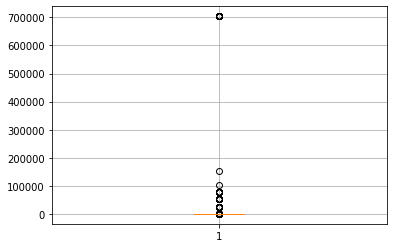

In [5]:
plt.boxplot(average_value["order_amount"])
plt.grid()
plt.show()

### Discussion
The entire box portion of the box plot is a line along 0, and hence we can further visually say that there are a lot of outliers.

### Histogram 
Another manner to show the presence of outliers visually is by plotting a histogram, this gives us the distribution of order amounts across the data set. 

Text(0.5, 0, 'Order Amounts')

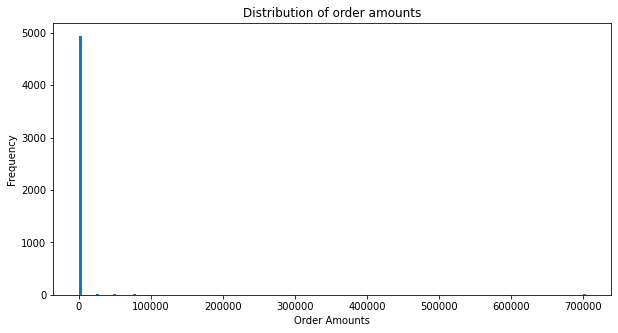

In [6]:
average_value.sort_values(by = 'order_amount', inplace = True)
average_value["order_amount"].plot(kind = 'hist', bins = 150,figsize = (10,5), title = 'Distribution of order amounts').set_xlabel("Order Amounts")

### Analysis of data without outliers: 

<AxesSubplot:>

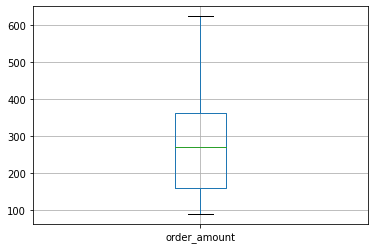

In [7]:
q1 = average_value.order_amount.quantile(q=0.25)
q2 = average_value.order_amount.quantile(q=0.5)
q3 = average_value.order_amount.quantile(q=0.75)
IQR = q3 - q1

average_value_truncated = average_value[(average_value.order_amount < q2 + IQR * 1.5) & (average_value.order_amount > q2 - IQR * 1.5)]
average_value_truncated.boxplot(column='order_amount')

In [8]:
print("Skew value: ", average_value_truncated.order_amount.skew())
print(average_value_truncated.order_amount.describe())

Skew value:  0.5476746052976319
count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64


We see from the above two cells that after cleaning some of the data and plotting the data which is only in the range median +/- 1.5 times the interquartile range _**IQR**_ that the distribution of the truncated dataset is now skewed towards lower values, the skewness factor of 0.54 further drives home the point that the truncated dataset does not contain outliers.  

# A) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

## Calculation error - Where we have gone wrong : 
###### From the above histogram showing distribution of order amounts and the histogram, we see that most of the order amounts are of very less values ( < 1000), and there are many many outliers in the dataset, which is contributing to the high *Average Order Value* (AOV).  

When we have such outliers present in the data, mean is usually not a good way to find summary of the data. 
We can use various other statistical measures to get the summary of our data, which are mentioned as follows : 

Median : This refers to the most central values of in a series of values. 

Trimmed mean : This is done by elminating the outliers in the dataset, and then finding the mean. 

# B) What metric would you report for this dataset?
## By looking at the boxplot of the truncated data set :
We can say that since the data is skewed towards lower values now, median will be the most suitable method 

# C) What is its value?
## From the description of the truncated dataset, we see that the median is **272**

# Question 2

## A ) How many orders were shipped by Speedy Express in total?

CREATE VIEW Shipper_Orders AS

SELECT Orders.OrderID, Orders.ShipperID, Shippers.ShipperName

FROM Orders 

JOIN Shippers

ON Shippers.ShipperID=Orders.ShipperID;


SELECT COUNT(*) FROM [Shipper_Orders]

WHERE ShipperName = 'Speedy Express';

**ANSWER: 54**

## B) What is the last name of the employee with the most orders? 

CREATE VIEW Employee_Orders AS 

SELECT Orders.EmployeeID, Employees.LastName, Orders.OrderID

FROM Orders

JOIN Employees

ON Employees.EmployeeID=Orders.EmployeeID; 

SELECT LastName, COUNT(*)

FROM Employee_Orders

GROUP BY LastName

ORDER BY COUNT(*) desc;

**ANSWER: Peacock, 40** 

## C) What product was ordered the most by customers in Germany?

CREATE VIEW Products_Ordered AS

SELECT Orders.OrderID, Customers.Country, OrderDetails.Quantity, Products.ProductName

FROM Orders, OrderDetails

JOIN Customers ON Orders.CustomerID=Customers.CustomerID

JOIN Products ON OrderDetails.ProductID=Products.ProductID

WHERE Country='Germany';

CREATE VIEW Product_Orders AS

SELECT ProductName, Quantity, COUNT(*) as 'Orders'

FROM Products_Ordered

GROUP BY ProductName;

SELECT ProductName, Quantity, Orders, (Quantity * Orders) AS TotalOrdered

FROM Product_Orders

ORDER BY TotalOrdered desc

LIMIT 1;

**Answer:**

**ProductName - Camembert Pierrot**

**Quantity - 40**

**Orders - 300**

**TotalOrdered - 12000**